In [3]:
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df_aw_custs = pd.read_csv('./AdvWorksCusts.csv')
df_aw_spend = pd.read_csv('./AW_AveMonthSpend.csv')
df_aw_bike_buyer = pd.read_csv('./AW_BikeBuyer.csv')

In [5]:
print(df_aw_custs.head())
print(df_aw_spend.head())
print(df_aw_bike_buyer.head())

   CustomerID Title  FirstName MiddleName LastName Suffix  \
0       11000   NaN        Jon          V     Yang    NaN   
1       11001   NaN     Eugene          L    Huang    NaN   
2       11002   NaN      Ruben        NaN   Torres    NaN   
3       11003   NaN    Christy        NaN      Zhu    NaN   
4       11004   NaN  Elizabeth        NaN  Johnson    NaN   

          AddressLine1 AddressLine2         City StateProvinceName  \
0      3761 N. 14th St          NaN  Rockhampton        Queensland   
1           2243 W St.          NaN      Seaford          Victoria   
2     5844 Linden Land          NaN       Hobart          Tasmania   
3     1825 Village Pl.          NaN   North Ryde   New South Wales   
4  7553 Harness Circle          NaN   Wollongong   New South Wales   

       ...        BirthDate   Education    Occupation Gender MaritalStatus  \
0      ...       1966-04-08  Bachelors   Professional      M             M   
1      ...       1965-05-14  Bachelors   Professional   

In [6]:
print(df_aw_spend.describe())
print(df_aw_spend.shape)
print(df_aw_spend.CustomerID.unique().shape)

         CustomerID  AveMonthSpend
count  16519.000000   16519.000000
mean   20234.225195      72.405957
std     5342.515987      27.285370
min    11000.000000      22.000000
25%    15604.500000      52.000000
50%    20221.000000      68.000000
75%    24860.500000      84.000000
max    29482.000000     176.000000
(16519, 2)
(16404,)


In [7]:
df_aw_spend.drop_duplicates(inplace=True, keep='last', subset="CustomerID")


In [8]:
df_aw_spend.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [9]:
df_aw_spend.AveMonthSpend.mean()

72.39100219458669

In [10]:
df_aw_spend.AveMonthSpend.median()

68.0

In [11]:
print(df_aw_bike_buyer.describe())
print(df_aw_bike_buyer.shape)
print(df_aw_bike_buyer.CustomerID.unique().shape)

         CustomerID     BikeBuyer
count  16519.000000  16519.000000
mean   20234.225195      0.332284
std     5342.515987      0.471046
min    11000.000000      0.000000
25%    15604.500000      0.000000
50%    20221.000000      0.000000
75%    24860.500000      1.000000
max    29482.000000      1.000000
(16519, 2)
(16404,)


In [12]:
df_aw_bike_buyer.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

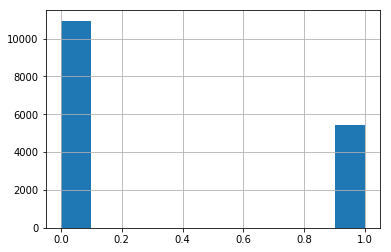

In [13]:
df_aw_bike_buyer.BikeBuyer.hist()

In [14]:
print(df_aw_custs.shape)
print(df_aw_custs.CustomerID.unique().shape)

(16519, 23)
(16404,)


In [15]:
df_aw_custs.drop_duplicates(inplace=True, keep='last', subset="CustomerID")

In [16]:
df_aw_custs[["YearlyIncome", "Occupation"]].groupby("Occupation").median()

,YearlyIncome
Occupation,
Clerical,49481.0
Management,118781.0
Manual,21722.0
Professional,99058.0
Skilled Manual,66471.5


In [17]:
df_aw_spend.head()

,CustomerID,AveMonthSpend
0,11000,89
1,11001,117
2,11002,123
3,11003,50
4,11004,95


In [18]:
df_aw_custs.set_index("CustomerID", inplace=True)
df_aw_spend.set_index("CustomerID", inplace=True)

In [19]:
print(df_aw_spend.head())

df_joined = df_aw_custs.join(df_aw_spend)
print(df_joined[["AveMonthSpend"]].head())

            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95
            AveMonthSpend
CustomerID               
11000                  89
11001                 117
11002                 123
11003                  50
11004                  95


In [20]:
print(df_joined.columns)
df_joined[["Gender", "AveMonthSpend", "BirthDate"]]
df_joined.dtypes
df_joined["Age"] = (pd.Timestamp("1998-01-01") - pd.to_datetime(df_joined["BirthDate"])).astype('<m8[Y]').astype("int")

Index(['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix',
       'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName',
       'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate',
       'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren',
       'YearlyIncome', 'AveMonthSpend'],
      dtype='object')


In [21]:
def age_group(age):
    if age < 25:
        return "<25"
    elif age < 45:
        return "25-45"
    elif age < 55:
        return "45-55"
    else:
        return ">=55"

In [22]:
df_joined["AgeGroup"] = df_joined["Age"].map(age_group)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CCB16ED438>]],
      dtype=object)

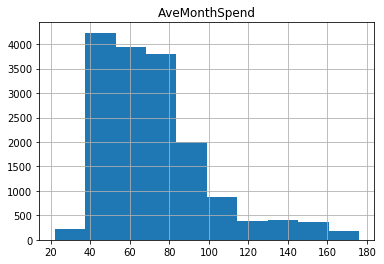

In [23]:
df_joined[["AgeGroup", "AveMonthSpend", "Gender"]].hist()


In [24]:
df_joined[["AgeGroup", "AveMonthSpend", "Gender"]].groupby(["AgeGroup", "Gender"]).sum()

AveMonthSpend
AgeGroup Gender               
25-45    F              293929
         M              473092
45-55    F               70079
         M              109613
<25      F               70476
         M              107683
>=55     F               24935
         M               37695

In [25]:
df_joined[["AgeGroup", "AveMonthSpend", "Gender"]].groupby(["AgeGroup", "Gender"]).describe()

AveMonthSpend                                                  \
                        count       mean        std   min   25%   50%     75%   
AgeGroup Gender                                                                 
25-45    F             4914.0  59.814611  16.599226  32.0  48.0  54.0   67.00   
         M             5067.0  93.367278  27.378939  50.0  75.0  83.0  107.00   
45-55    F             1210.0  57.916529  16.933641  29.0  47.0  53.0   61.00   
         M             1227.0  89.334148  27.229150  51.0  71.0  82.0   95.00   
<25      F             1456.0  48.403846  11.892605  30.0  42.0  46.0   51.00   
         M             1476.0  72.955962  18.502554  50.0  63.0  69.0   76.25   
>=55     F              534.0  46.694757  11.965024  22.0  40.0  45.0   49.00   
         M              520.0  72.490385  19.671775  29.0  62.0  69.0   75.00   

                        
                   max  
AgeGroup Gender         
25-45    F       114.0  
         M       176.0  
45-55    F       110.0  
         M       170.0  
<25      F       112.0  
         M       176.0  
>=55     F        93.0  
         M       147.0

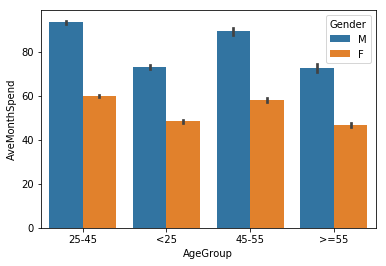

In [26]:
sns.barplot(data=df_joined[["AgeGroup", "AveMonthSpend", "Gender"]], y="AveMonthSpend", x="AgeGroup", hue="Gender")

In [38]:
def plot_box(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices, palette='RdBu_r')
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        

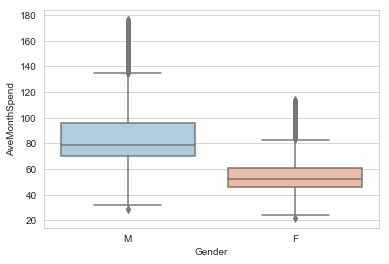

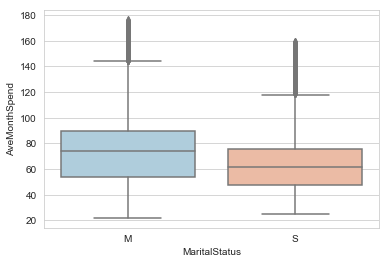

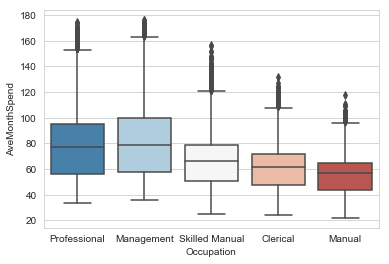

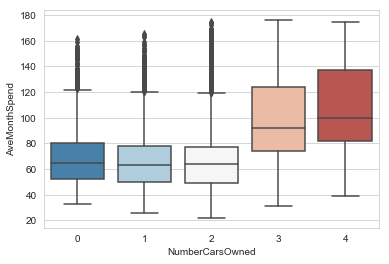

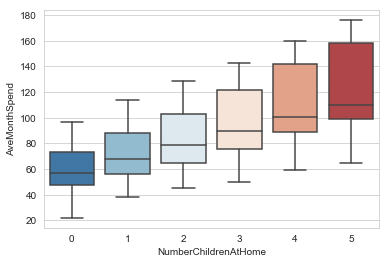

In [39]:
cat_cols = ['Gender', 'MaritalStatus', 'Occupation', 'NumberCarsOwned', 'NumberChildrenAtHome']
plot_box(df_joined, cat_cols, col_y="AveMonthSpend")    

In [41]:
df_aw_bike_buyer.set_index("CustomerID", inplace=True)
df_joined = df_joined.join(df_aw_bike_buyer)


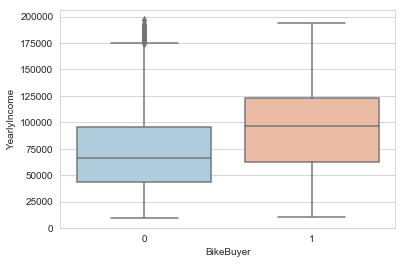

In [47]:
cat_cols = ['BikeBuyer']
plot_box(df_joined, cat_cols, col_y="YearlyIncome")    

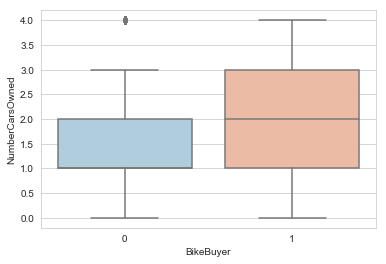

In [48]:
cat_cols = ['BikeBuyer']
plot_box(df_joined, cat_cols, col_y="NumberCarsOwned")

In [50]:
df_joined[['BikeBuyer', 'NumberCarsOwned']].groupby('BikeBuyer').median()


,NumberCarsOwned
BikeBuyer,
0,1
1,2


In [51]:
df_joined[['BikeBuyer', 'Occupation']].groupby('BikeBuyer').describe()

Occupation                             
               count unique             top  freq
BikeBuyer                                        
0              10949      5  Skilled Manual  2903
1               5455      5    Professional  2184